In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

upload and read the data files customer.csv, tramnsactions.csv, products.csv

In [ ]:
from google.colab import files
file=files.upload()

Saving Transactions.csv to Transactions (1).csv
Saving Products.csv to Products (1).csv
Saving Customers.csv to Customers (1).csv


In [ ]:
cust_df=pd.read_csv("Customers.csv")
prod_df=pd.read_csv("Products.csv")
trans_df=pd.read_csv("Transactions.csv")

# exploratory data analysis

#check for any null values
no empty or null values in the three datasets

In [ ]:
print(cust_df.isnull().sum(), prod_df.isnull().sum(), trans_df.isnull().sum())
print(cust_df.isna().sum(), prod_df.isna().sum(), trans_df.isna().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


##customer dataset

In [ ]:
print(cust_df.shape)
cust_df.head()

(200, 5)


,CustomerID,CustomerName,Region,SignupDate,Days
0,C0001,Lawrence Carroll,South America,2022-07-10,933
1,C0002,Elizabeth Lutz,Asia,2022-02-13,1080
2,C0003,Michael Rivera,South America,2024-03-07,327
3,C0004,Kathleen Rodriguez,South America,2022-10-09,842
4,C0005,Laura Weber,Asia,2022-08-15,897


In [ ]:
cust_df.describe()

,CustomerID,CustomerName,Region,SignupDate
count,200,200,200,200
unique,200,200,4,179
top,C0001,Lawrence Carroll,South America,2024-11-11
freq,1,1,59,3


In [ ]:
#check for the correct data types
cust_df.dtypes

,0
CustomerID,object
CustomerName,object
Region,object
SignupDate,object


In [ ]:
#sign up date is in object data type --> convert into datetime
cust_df['SignupDate']=pd.to_datetime(cust_df['SignupDate'])
cust_df.dtypes

,0
CustomerID,object
CustomerName,object
Region,object
SignupDate,datetime64[ns]


In [ ]:
# number of days from the signup date --> to check how old the customer is
from datetime import datetime
today=datetime.today()
cust_df['Days']=(today-cust_df['SignupDate']).dt.days
cust_df

,CustomerID,CustomerName,Region,SignupDate,Days
0,C0001,Lawrence Carroll,South America,2022-07-10,933
1,C0002,Elizabeth Lutz,Asia,2022-02-13,1080
2,C0003,Michael Rivera,South America,2024-03-07,327
3,C0004,Kathleen Rodriguez,South America,2022-10-09,842
4,C0005,Laura Weber,Asia,2022-08-15,897
...,...,...,...,...,...
195,C0196,Laura Watts,Europe,2022-06-07,966
196,C0197,Christina Harvey,Europe,2023-03-21,679
197,C0198,Rebecca Ray,Europe,2022-02-27,1066
198,C0199,Andrea Jenkins,Europe,2022-12-03,787


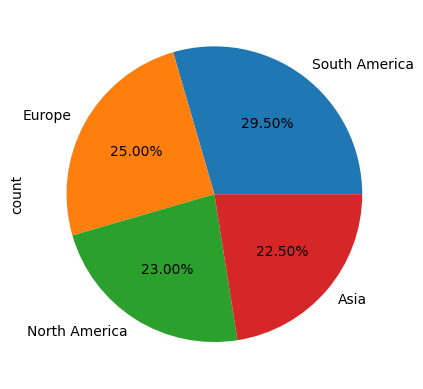

In [ ]:
#insights derived from region and signup date
cust_df['Region'].value_counts().plot(kind='pie',autopct='%.2f%%')
plt.show()

###region wise distribution of customer based on the days since he signed up

              Days
count   200.000000
mean    558.645000
std     325.526568
min      31.000000
25%     290.500000
50%     515.500000
75%     854.500000
max    1102.000000


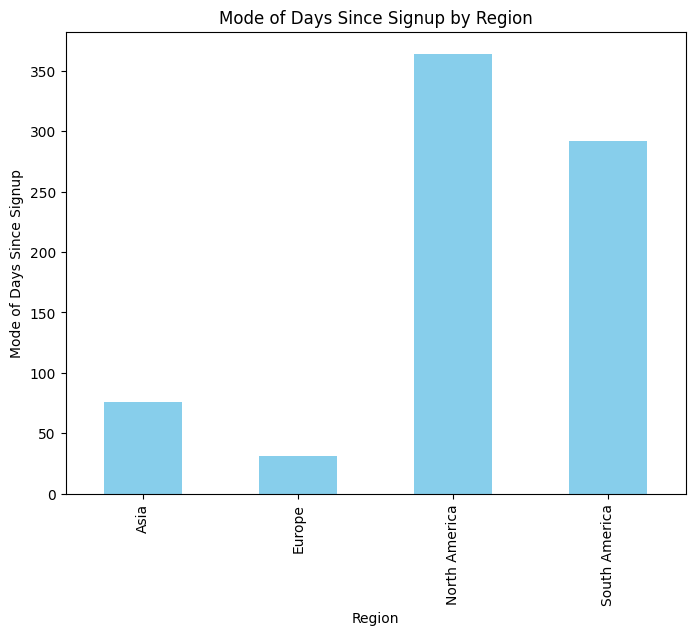

In [ ]:
print(pd.DataFrame(cust_df['Days'].describe()))

Days_since_signup = (cust_df.groupby('Region')['Days']).agg(lambda x: x.mode()[0])
#mode_frequency = cust_df['Days'].value_counts()[Days_since_signup].values[0]

# Plot the results
Days_since_signup.plot(kind='bar', color='skyblue', figsize=(8, 6))
plt.title('Mode of Days Since Signup by Region')
plt.xlabel('Region')
plt.ylabel('Mode of Days Since Signup')
plt.show()

In [ ]:
# the oldest customer belongs to the region
cust_df.loc[cust_df['Days'].idxmax()]

,117
CustomerID,C0118
CustomerName,Jacob Holt
Region,South America
SignupDate,2022-01-22 00:00:00
Days,1102


In [ ]:
#the recent customer belongs to the region
cust_df.loc[cust_df['Days'].idxmin()]

,181
CustomerID,C0182
CustomerName,Joshua Preston
Region,Europe
SignupDate,2024-12-28 00:00:00
Days,31


##product dataset

In [ ]:
prod_df.shape

(100, 4)

In [ ]:
prod_df.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [ ]:
print(prod_df['ProductName'].value_counts())

ProductName
ActiveWear Smartwatch         4
SoundWave Headphones          4
BookWorld Biography           3
TechPro T-Shirt               3
SoundWave Cookbook            3
                             ..
BookWorld Jacket              1
ComfortLiving Smartphone      1
SoundWave T-Shirt             1
ComfortLiving Cookware Set    1
SoundWave Laptop              1
Name: count, Length: 66, dtype: int64


In [ ]:
print(prod_df['Category'].value_counts())

Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64


In [ ]:
#check for the correct data types
print(prod_df.dtypes)

ProductID       object
ProductName     object
Category        object
Price          float64
dtype: object


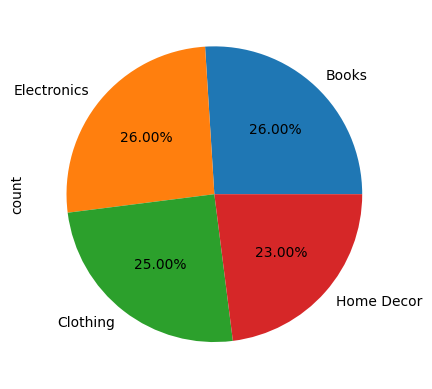

In [ ]:
# visualisation of categories
prod_df['Category'].value_counts().plot(kind='pie',autopct='%.2f%%')
plt.show()

In [ ]:
# statistics of numeric columns
prod_df.describe()

,Price
count,100.000000
mean,267.551700
std,143.219383
min,16.080000
25%,147.767500
50%,292.875000
75%,397.090000
max,497.760000


In [ ]:
pd.DataFrame(prod_df.groupby('Category')['Price'].describe())

,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
Books,26.0,292.212308,153.800135,33.59,154.2975,337.94,419.2125,497.76
Clothing,25.0,263.720000,157.965038,18.82,126.3400,303.50,389.2000,481.78
Electronics,26.0,275.353462,137.056612,16.08,168.8000,282.72,394.3650,459.86
Home Decor,23.0,235.020000,122.236552,41.18,142.3800,235.58,314.9750,454.53


<Figure size 1000x600 with 0 Axes>

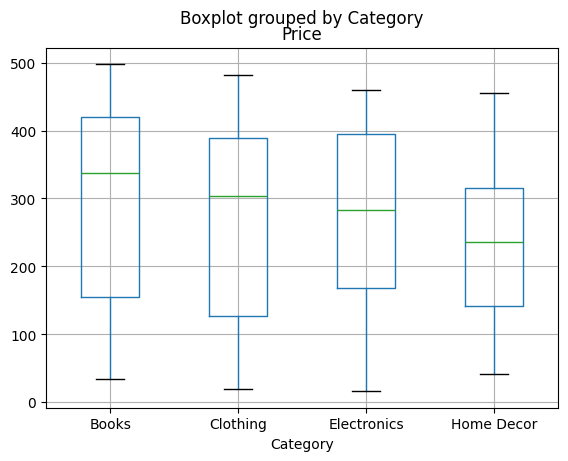

In [ ]:
plt.figure(figsize=(10, 6))
prod_df.boxplot(column='Price', by='Category')
plt.show()

Books have the highest average price at 292.21

Electronics follow with an average of 275.35

Clothing has an average price of 263.72

Home Decor has the lowest average at 235.02



##transaction dataset

In [ ]:
print(trans_df.shape)
trans_df.head()

(1000, 7)


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [ ]:
trans_df.describe()
#check for the correct datypes
print(trans_df.dtypes)


TransactionID       object
CustomerID          object
ProductID           object
TransactionDate     object
Quantity             int64
TotalValue         float64
Price              float64
dtype: object


In [ ]:
trans_df['TransactionDate']=pd.to_datetime(trans_df['TransactionDate'])

In [ ]:
#only transaction date i sin objectf format ---> convert into datetime
trans_df['Day'] = trans_df['TransactionDate'].dt.day_of_week
trans_df['month'] = trans_df['TransactionDate'].dt.month
trans_df['Year'] = trans_df['TransactionDate'].dt.year

trans_df['Time'] = trans_df['TransactionDate'].dt.time

In [ ]:
#delete the unnecessary column
trans_df.drop('TransactionDate', axis=1, inplace=True)

In [ ]:
#statistics of numric columns
trans_df.describe()

,Quantity,TotalValue,Price,Day,month,Year
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,2.537000,689.995560,272.55407,2.893000,6.288000,2023.996000
std,1.117981,493.144478,140.73639,1.983301,3.437859,0.063151
min,1.000000,16.080000,16.08000,0.000000,1.000000,2023.000000
25%,2.000000,295.295000,147.95000,1.000000,3.000000,2024.000000
50%,3.000000,588.880000,299.93000,3.000000,6.000000,2024.000000
75%,4.000000,1011.660000,404.40000,5.000000,9.000000,2024.000000
max,4.000000,1991.040000,497.76000,6.000000,12.000000,2024.000000


In [ ]:
daily_sale=trans_df.groupby('Day')['TotalValue'].sum()
daily_sale.describe()

,TotalValue
count,7.000000
mean,98570.794286
std,12918.000220
min,81399.740000
25%,89819.010000
50%,99202.710000
75%,105275.970000
max,119203.150000


On an Average, ₹2047 is the daily sale

#below is the top 5 products by total sales

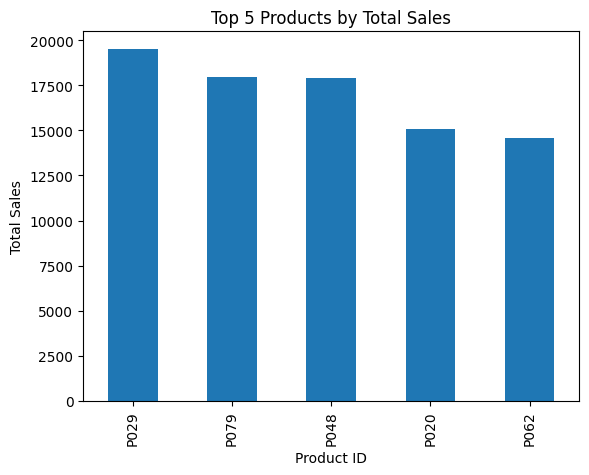

In [ ]:
trans_df.groupby('ProductID')['TotalValue'].sum().sort_values(ascending=False).head().plot(kind='bar')
plt.title('Top 5 Products by Total Sales')
plt.xlabel('Product ID')
plt.ylabel('Total Sales')
plt.show()

top 5 customers by spending amount

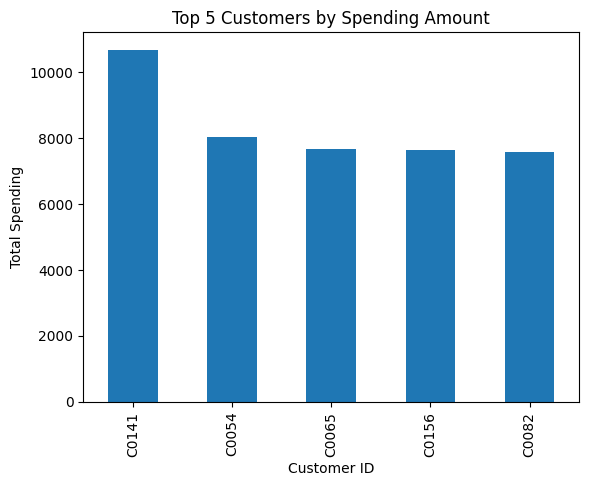

In [ ]:
trans_df.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head().plot(kind='bar')
plt.title('Top 5 Customers by Spending Amount')
plt.xlabel('Customer ID')
plt.ylabel('Total Spending')
plt.show()

#monthly transaction trend

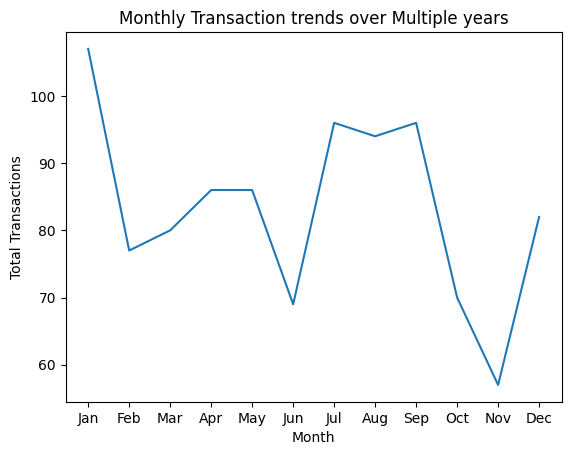

In [ ]:
trans_df.groupby('month')['TotalValue'].count().plot(kind='line')
plt.title('Monthly Transaction trends over Multiple years')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel('Month')
plt.ylabel('Total Transactions')
plt.show()


#Daily transaction trend

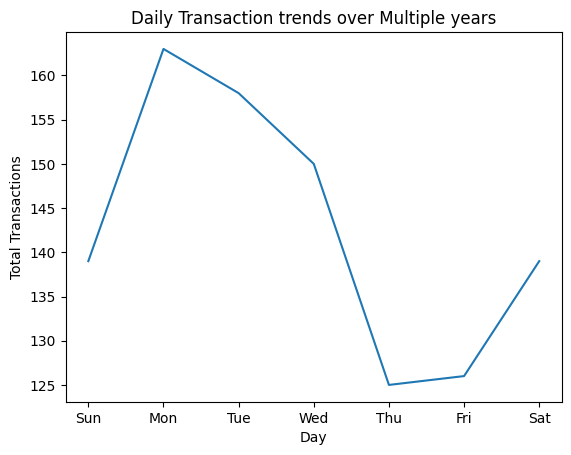

In [ ]:
trans_df.groupby('Day')['TotalValue'].count().plot(kind='line')
plt.xticks([0,1,2,3,4,5,6],['Sun','Mon','Tue','Wed','Thu','Fri','Sat'])
plt.title('Daily Transaction trends over Multiple years')
plt.xlabel('Day')
plt.ylabel('Total Transactions')
plt.show()

In [ ]:
# the product which is best seller and the product which has least sale over the years
print("the product which is bestseller: ", trans_df.groupby('ProductID')['TotalValue'].sum().sort_values(ascending=False).head(1))
print("the product which has least sale: ",trans_df.groupby('ProductID')['TotalValue'].sum().sort_values(ascending=True).head(1))

the product which is bestseller:  ProductID
P029    19513.8
Name: TotalValue, dtype: float64
the product which has least sale:  ProductID
P044    244.66
Name: TotalValue, dtype: float64


# most frequently and least frequently bought products

In [ ]:
print("frequently bought product ", trans_df.groupby('ProductID')['Quantity'].count().sort_values(ascending=False).head(1))
print("less frequent product ",trans_df.groupby('ProductID')['Quantity'].count().sort_values(ascending=True).head(1))

frequently bought product  ProductID
P059    19
Name: Quantity, dtype: int64
less frequent product  ProductID
P031    4
Name: Quantity, dtype: int64
